## Imports

In [ ]:
# Запустить эту ячейку, затем перезапустить среду и выполнить эту ячейку еще раз
%%capture
!pip uninstall -y scikit-learn
!pip install scikit-learn
!pip uninstall -y auto-sklearn
!pip install auto-sklearn

In [ ]:
import numpy as np
print(np.__version__)

1.24.3


In [ ]:
# Запустить эту ячейку, затем перезапустить среду
%%capture
pip install --upgrade numpy

In [ ]:
import autosklearn
import autosklearn.classification
from autosklearn.classification import AutoSklearnClassifier

In [ ]:
import numpy as np # Работа с массивами данных
import pandas as pd # Работа с табличными данными
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop # Оптимизаторы
from tensorflow.keras.preprocessing.text import Tokenizer # Токенизатор для преобразование текстов в последовательности
from sklearn.preprocessing import StandardScaler # Масштабирование данных
import gdown # Загрузка датасетов из облака google
import re # Регулярные выражения
import matplotlib.pyplot as plt # Отрисовка графиков
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
%matplotlib inline
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, precision_recall_curve
from tensorflow.keras.callbacks import ModelCheckpoint,Callback #,BackupAndestore

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder       # Импортируем модуль preprocessing в котором хранится LabelEncoder
label_encoder = preprocessing.LabelEncoder() 

from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import pickle
from keras.models import load_model

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras import backend as K

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,precision_recall_curve, ConfusionMatrixDisplay
import seaborn as sns

from datetime import datetime

from pprint import pprint
#import sklearn.datasets
import sklearn.metrics
import sklearn.model_selection

# Подключить Google диск
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import seaborn as sb  
# CЕРВИСНЫЕ ФУНКЦИИ

# Функция для подсчета F1-меры для использования в модели
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Функция для вывода результата
def my_display_result(y_test, y_pred):
    y_pred_argmax = np.argmax(y_pred, axis=1)
    plt.figure(figsize=(6,3))
    sns.heatmap(confusion_matrix(y_test, y_pred_argmax), xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], annot=True, fmt='d')
    my_precision_score = precision_score(y_test,y_pred_argmax)
    my_recall_score = recall_score(y_test,y_pred_argmax)
    my_f1 = my_f1_score(my_precision_score, my_recall_score)
    print('precision score: ', round(my_precision_score, 2))
    print('recall score: ', round(my_recall_score, 2))
    print('f1 score: ', round(my_f1, 2))

# Функция для подсчета F1-меры
def my_f1_score(precision, recall):
    my_f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return my_f1_val    


# Функция для вывода результата, если нужен Argmax
def my_display_result_argmax(y_test, y_pred):
    y_test_argmax = np.argmax(y_test, axis=1) 
    y_pred_argmax = np.argmax(y_pred, axis=1)
    y_pred_argmax = np.argmax(y_pred, axis=1)
    plt.figure(figsize=(6,3))
    sns.heatmap(confusion_matrix(y_test_argmax, y_pred_argmax), xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], annot=True, fmt='d')
    my_precision_score = precision_score(y_test_argmax,y_pred_argmax)
    my_recall_score = recall_score(y_test_argmax,y_pred_argmax)
    my_f1 = my_f1_score(my_precision_score, my_recall_score)
    print('precision score: ', my_precision_score)
    print('recall score: ', my_recall_score)
    print('f1 score: ', my_f1)

# Check the number of occurrences of y = 1 in y_train and y_test
def occurrences (y_train, y_test):
  # Count the number of occurrences of y_train
  unique, counts = np.unique(y_train, return_counts=True)
  # Print the counts of occurrences of y_train
  for val, count in zip(unique, counts):
      print(f"{val}: {count}")
      if val == 1:
        count_y1_in_train = count

  # Count the number of occurrences of y_test
  unique, counts = np.unique(y_test, return_counts=True)
  for val, count in zip(unique, counts):
      print(f"{val}: {count}")
      if val == 1:
        count_y1_in_test = count

  count_1_elements_20_persent = 0
  count_1_elements_20_persent =  (count_y1_in_train + count_y1_in_test)*0.2
  result = "    Distribution is correct " if round(count_1_elements_20_persent) == round(count_y1_in_test) else "    Distribution is false"
  print("20% of sum in 1 in y_train and y_test is:", round(count_1_elements_20_persent), result)


# Функция для вывода результата с тремя пороговыми коэффиентами
def threshold(index_number_1, index_number_2, index_number_3, y_pred, y_test):
    y_pred_PositiveClass_1 = np.asarray([np.round(x * 1000) for x in y_pred])
    y_pred_PositiveClass_1_1 = np.where(y_pred_PositiveClass_1 > index_number_1, 1, 0)
    y_pred_PositiveClass_1_2 = np.where(y_pred_PositiveClass_1 > index_number_2, 1, 0)    
    y_pred_PositiveClass_1_3 = np.where(y_pred_PositiveClass_1 > index_number_3, 1, 0)   

    fig, ax = plt.subplots(1, 3, figsize=(18, 3))

    y_pred_argmax_1 = np.argmax(y_pred_PositiveClass_1_1, axis=1)
    y_pred_argmax_2 = np.argmax(y_pred_PositiveClass_1_2, axis=1)
    y_pred_argmax_3 = np.argmax(y_pred_PositiveClass_1_3, axis=1)

    my_precision_score_1 = precision_score(y_test_argmax,y_pred_argmax_1)
    my_recall_score_1 = recall_score(y_test_argmax,y_pred_argmax_1)
    my_f1_1 = my_f1_score(my_precision_score_1, my_recall_score_1)

    my_precision_score_2 = precision_score(y_test_argmax,y_pred_argmax_2)
    my_recall_score_2 = recall_score(y_test_argmax,y_pred_argmax_2)
    my_f1_2 = my_f1_score(my_precision_score_2, my_recall_score_2)

    my_precision_score_3 = precision_score(y_test_argmax,y_pred_argmax_3)
    my_recall_score_3 = recall_score(y_test_argmax,y_pred_argmax_3)
    my_f1_3 = my_f1_score(my_precision_score_3, my_recall_score_3)

    tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred_argmax_1).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_argmax_2).ravel()
    tn3, fp3, fn3, tp3 = confusion_matrix(y_test, y_pred_argmax_3).ravel()

    sns.heatmap(confusion_matrix(y_test, y_pred_argmax_1), xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], annot=True, fmt='d', ax=ax[0])
    sns.heatmap(confusion_matrix(y_test, y_pred_argmax_2), xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], annot=True, fmt='d', ax=ax[1])
    sns.heatmap(confusion_matrix(y_test, y_pred_argmax_3), xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], annot=True, fmt='d', ax=ax[2])

    # ax[0].set_title('Model 1 (Threshold = {})'.format(index_number_1), loc='center') # как добавить в этот принт эту информацию     print('f1 score: ', my_f1) ?
    ax[0].set_title('Threshold = {}, F1: {:.0f}%, FP/TP: {:.0f}%'.format(index_number_1, my_f1_1*100,fp1*100/tp1), loc='center')
    ax[1].set_title('Threshold = {}, F1: {:.0f}%, FP/TP: {:.0f}%'.format(index_number_2, my_f1_2*100,fp2*100/tp2), loc='center')
    ax[2].set_title('Threshold = {}, F1: {:.0f}%, FP/TP: {:.0f}%'.format(index_number_3, my_f1_3*100,fp3*100/tp3), loc='center')

    plt.show()


# Функция для вывода распределения уникальных значений
def show_unique_values(df_positiveClass):
  unique_values = list(set(df_positiveClass))
  counts = [df_positiveClass.count(value) for value in unique_values]
  plt.scatter(unique_values, counts)
  plt.rcParams['figure.figsize'] = (15, 3)
  plt.xticks(range(0, 1000, 100))
  plt.xlabel('Unique Values')
  plt.ylabel('Counts')
  plt.title('Unique Values and Counts')
  plt.show()
  data = {'Unique Values': unique_values, 'Counts': counts}
  df = pd.DataFrame(data)
  df.sort_values(by='Unique Values', ascending=True, inplace=True)
  print('First 5 elements:')
  print(df[:5])
  print('Last 5 elements:')
  print(df[-5:])



Mounted at /content/drive


In [ ]:
# Функция для вывода распределения уникальных значений
def show_unique_values_2(df_positiveClass):
    y_pred_np = np.array(y_pred_PositiveClass)
    y_test_np = np.array(y_test)
    result_y = np.concatenate((y_pred_np.reshape(-1, 1), y_test_np.reshape(-1, 1)), axis=1)
    filtered_result_y = result_y[np.where(result_y[:, 1] == 1)]
    y_pred_filtered, y_test_filtered = filtered_result_y.transpose()
    unique_values1 = np.unique(y_pred_filtered)
    unique_values, counts = np.unique(y_pred_filtered, return_counts=True)

    min_value = min(unique_values1)
    max_value = max(unique_values1)
    normalized_values = [(value - min_value) / (max_value - min_value) * 1000 for value in unique_values1]

    plt.scatter(normalized_values, counts, color='red')
    plt.rcParams['figure.figsize'] = (15, 3)
    plt.xticks(normalized_values)
    plt.xlabel('Unique Values')
    plt.ylabel('Counts')
    plt.title('Unique Values and Counts')
    plt.show()
    data = {'Unique Values': normalized_values, 'Counts': counts}
    df = pd.DataFrame(data)
    df.sort_values(by='Unique Values', ascending=True, inplace=True)
    print('First 5 elements:')
    print(df[:5])
    print('Last 5 elements:')
    print(df[-5:])

In [ ]:
# Функция для вывода распределения уникальных значений
def show_unique_values_3(df_positiveClass):
    y_pred_np = np.array(y_pred_PositiveClass)
    y_test_np = y_test_argmax
    result_y = np.concatenate((y_pred_np.reshape(-1, 1), y_test_np.reshape(-1, 1)), axis=1)
    filtered_result_y = result_y[np.where(result_y[:, 1] == 1)]
    y_pred_filtered, y_test_filtered = filtered_result_y.transpose()
    unique_values1 = np.unique(y_pred_filtered)
    unique_values, counts = np.unique(y_pred_filtered, return_counts=True)

    min_value = min(unique_values1)
    max_value = max(unique_values1)
    normalized_values = [(value - min_value) / (max_value - min_value) * 1000 for value in unique_values1]

    plt.scatter(normalized_values, counts, color='red')
    plt.rcParams['figure.figsize'] = (15, 3)
    plt.xticks(normalized_values)
    plt.xlabel('Unique Values')
    plt.ylabel('Counts')
    plt.title('Unique Values and Counts')
    plt.show()
    data = {'Unique Values': normalized_values, 'Counts': counts}
    df = pd.DataFrame(data)
    df.sort_values(by='Unique Values', ascending=True, inplace=True)
    print('First 5 elements:')
    print(df[:5])
    print('Last 5 elements:')
    print(df[-5:])

# Dataset preprocessing

In [ ]:
## Target 1
df_1 = pd.read_excel('/content/drive/MyDrive/Scoring/2567_КИдлятеста_5000_безПИ.xlsx', index_col=0, skiprows=[0, 1], header=0, sheet_name=0)

In [ ]:
df_1.head()

,city_name,population,date of birth,gender,education,position,dt_nbki,id_nbki,issued,amount,...,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support
region_name,,,,,,,,,,,,,,,,,,,,,
Новосибирская область,г. Барабинск,29122.0,1980-07-28,Женский,Высшее,работник бюджетной сферы,2023-03-05,27ab5815-bb2d-11ed-b80d-3cfdfed12971,2013-10-07,75000.0,...,NaN,0.0,NaT,Банк,0.0,2023-01-12,2014-09-13,NaN,113018.48,0.0
Новосибирская область,г. Барабинск,29122.0,1980-07-28,Женский,Высшее,работник бюджетной сферы,2023-03-05,27ab5815-bb2d-11ed-b80d-3cfdfed12971,2013-11-06,155740.0,...,NaN,0.0,NaT,Банк,0.0,2023-01-12,2014-09-02,NaN,9999.73,0.0
Новосибирская область,г. Барабинск,29122.0,1980-07-28,Женский,Высшее,работник бюджетной сферы,2023-03-05,27ab5815-bb2d-11ed-b80d-3cfdfed12971,2016-04-05,5000.0,...,NaN,0.0,NaT,МФО,0.0,2016-04-14,NaT,NaN,5000.00,0.0
Новосибирская область,г. Барабинск,29122.0,1980-07-28,Женский,Высшее,работник бюджетной сферы,2023-03-05,27ab5815-bb2d-11ed-b80d-3cfdfed12971,2016-04-16,5000.0,...,NaN,0.0,NaT,МФО,0.0,2016-05-12,NaT,NaN,5000.00,0.0
Новосибирская область,г. Барабинск,29122.0,1980-07-28,Женский,Высшее,работник бюджетной сферы,2023-03-05,27ab5815-bb2d-11ed-b80d-3cfdfed12971,2016-05-13,5000.0,...,NaN,0.0,NaT,МФО,0.0,2016-06-11,NaT,NaN,5000.00,0.0


In [ ]:
# Создаем копию датасета
data_backup = df_1.copy()

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167105 entries, Новосибирская область to Краснодарский край
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   city_name                            167083 non-null  object        
 1   population                           167083 non-null  float64       
 2   date of birth                        167105 non-null  datetime64[ns]
 3   gender                               167105 non-null  object        
 4   education                            120142 non-null  object        
 5   position                             152365 non-null  object        
 6   dt_nbki                              167105 non-null  datetime64[ns]
 7   id_nbki                              167105 non-null  object        
 8   issued                               167060 non-null  datetime64[ns]
 9   amount                               167060

In [ ]:
def drop_columns(df):
    columns_to_drop = []
    for col in df.columns:
        null_count = df[col].isnull().sum()
        null_percent = null_count / len(df) * 100
        fill_percent = 100 - null_percent
        if null_percent > 99:
            columns_to_drop.append(col)
    if columns_to_drop:
        df.drop(columns_to_drop, axis=1, inplace=True)
        print(f"Columns {', '.join(columns_to_drop)} have been dropped")
    else:
        print("No columns were dropped")
drop_columns(df_1)

Columns volume_commitment, surety_period have been dropped


In [ ]:
for column_name in df_1.columns:
    # проверяем, состоит ли столбец полностью из '[]'
    is_column_empty = (df_1[column_name] == '[]').all()
    
    # если столбец полностью состоит из '[]', то удаляем его
    if is_column_empty:
        df_1.drop(column_name, axis=1, inplace=True)
        print(f"Столбец {column_name} удален.")

In [ ]:
# Удаляем из ip адреса все, кроме числовых значений
df_1['ym:s:ipAddress'] = df_1['ym:s:ipAddress'].str.replace(r'\D+', '')
# Приведем ip адреса к целочисленным значениям
df_1['ym:s:ipAddress'] = df_1['ym:s:ipAddress'].astype(int)

<ipython-input-9-49237de2c52b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_1['ym:s:ipAddress'] = df_1['ym:s:ipAddress'].str.replace(r'\D+', '')


In [ ]:
# Заполняем NaN значения в столбце средними значениями по столбцу
df_1['ym:s:lastDirectClickOrder'] = df_1['ym:s:lastDirectClickOrder'].fillna(df_1['ym:s:lastDirectClickOrder'].mean())
# Приведем значения столбца к типу float
df_1['ym:s:lastDirectClickOrder'] = df_1['ym:s:lastDirectClickOrder'].astype(float)
df_1['ym:s:visitID'] = df_1['ym:s:visitID'].astype(float)

In [ ]:
# Изменим тип столбца с uint64 на int64
df_1['ym:s:clientID'] = df_1['ym:s:clientID'].astype(int)

In [ ]:
# Создаем LabelEncoder
le = LabelEncoder()
           
# Переводим все столбцы в числовые значения циклом
for column_name in df_1.select_dtypes(exclude=['float', 'int']).columns:
    df_1[column_name] = le.fit_transform(df_1[column_name])

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167105 entries, Новосибирская область to Краснодарский край
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city_name                            167105 non-null  int64  
 1   population                           167083 non-null  float64
 2   date of birth                        167105 non-null  int64  
 3   gender                               167105 non-null  int64  
 4   education                            167105 non-null  int64  
 5   position                             167105 non-null  int64  
 6   dt_nbki                              167105 non-null  int64  
 7   id_nbki                              167105 non-null  int64  
 8   issued                               167105 non-null  int64  
 9   amount                               167060 non-null  float64
 10  currency                             167105 non-null 

In [ ]:
# Переносим целевой столбец на первый столбец
y = df_1['ym:s:goalsID'].copy()
df_1.drop('ym:s:goalsID',  axis=1, inplace=True)
df_1.insert(0,'ym:s:goalsID', y)

In [ ]:
#df_1['ym:s:openstatAd'] = df_1['ym:s:openstatAd'].fillna(df_1['ym:s:openstatAd'].mean())
#df_1['ym:s:openstatCampaign'] = df_1['ym:s:openstatCampaign'].fillna(df_1['ym:s:openstatCampaign'].mean())

In [ ]:
# Назначаем X и y
X = df_1.iloc[:,1:]
y = df_1.iloc[:,0]

In [ ]:
print(set(y))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167105 entries, Новосибирская область to Краснодарский край
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city_name                            167105 non-null  int64  
 1   population                           167083 non-null  float64
 2   date of birth                        167105 non-null  int64  
 3   gender                               167105 non-null  int64  
 4   education                            167105 non-null  int64  
 5   position                             167105 non-null  int64  
 6   dt_nbki                              167105 non-null  int64  
 7   id_nbki                              167105 non-null  int64  
 8   issued                               167105 non-null  int64  
 9   amount                               167060 non-null  float64
 10  currency                             167105 non-null 

## Select Bestfeatures

In [ ]:
# Нормализуем данные
scaler = StandardScaler(with_mean=False)
scaler.fit(X)
X_scaled = scaler.transform(X)

NameError: ignored

In [ ]:
# Применим SelectKBest для извлечения лучших признаков
model = SelectKBest(score_func=f_regression, k=50)
fit = model.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Соединяем два датафрейма для лучше визуализации 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # названия столбцов нового датафрейма
print(featureScores.nlargest(50,'Score'))  # печатаем лучшие признаки

ValueError: ignored

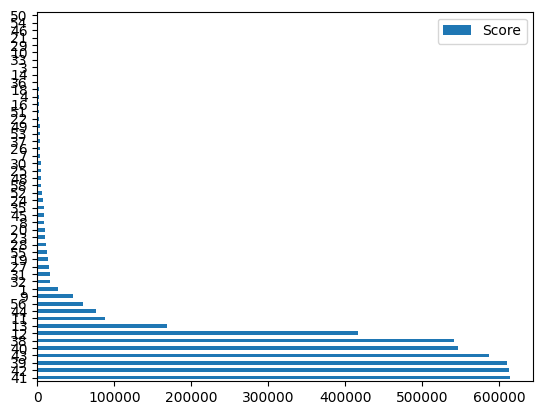

In [ ]:
featureScores.nlargest(50,'Score').plot(kind='barh')
plt.show() #plot graph of feature importances for better visualization

## Corellation Heatmap

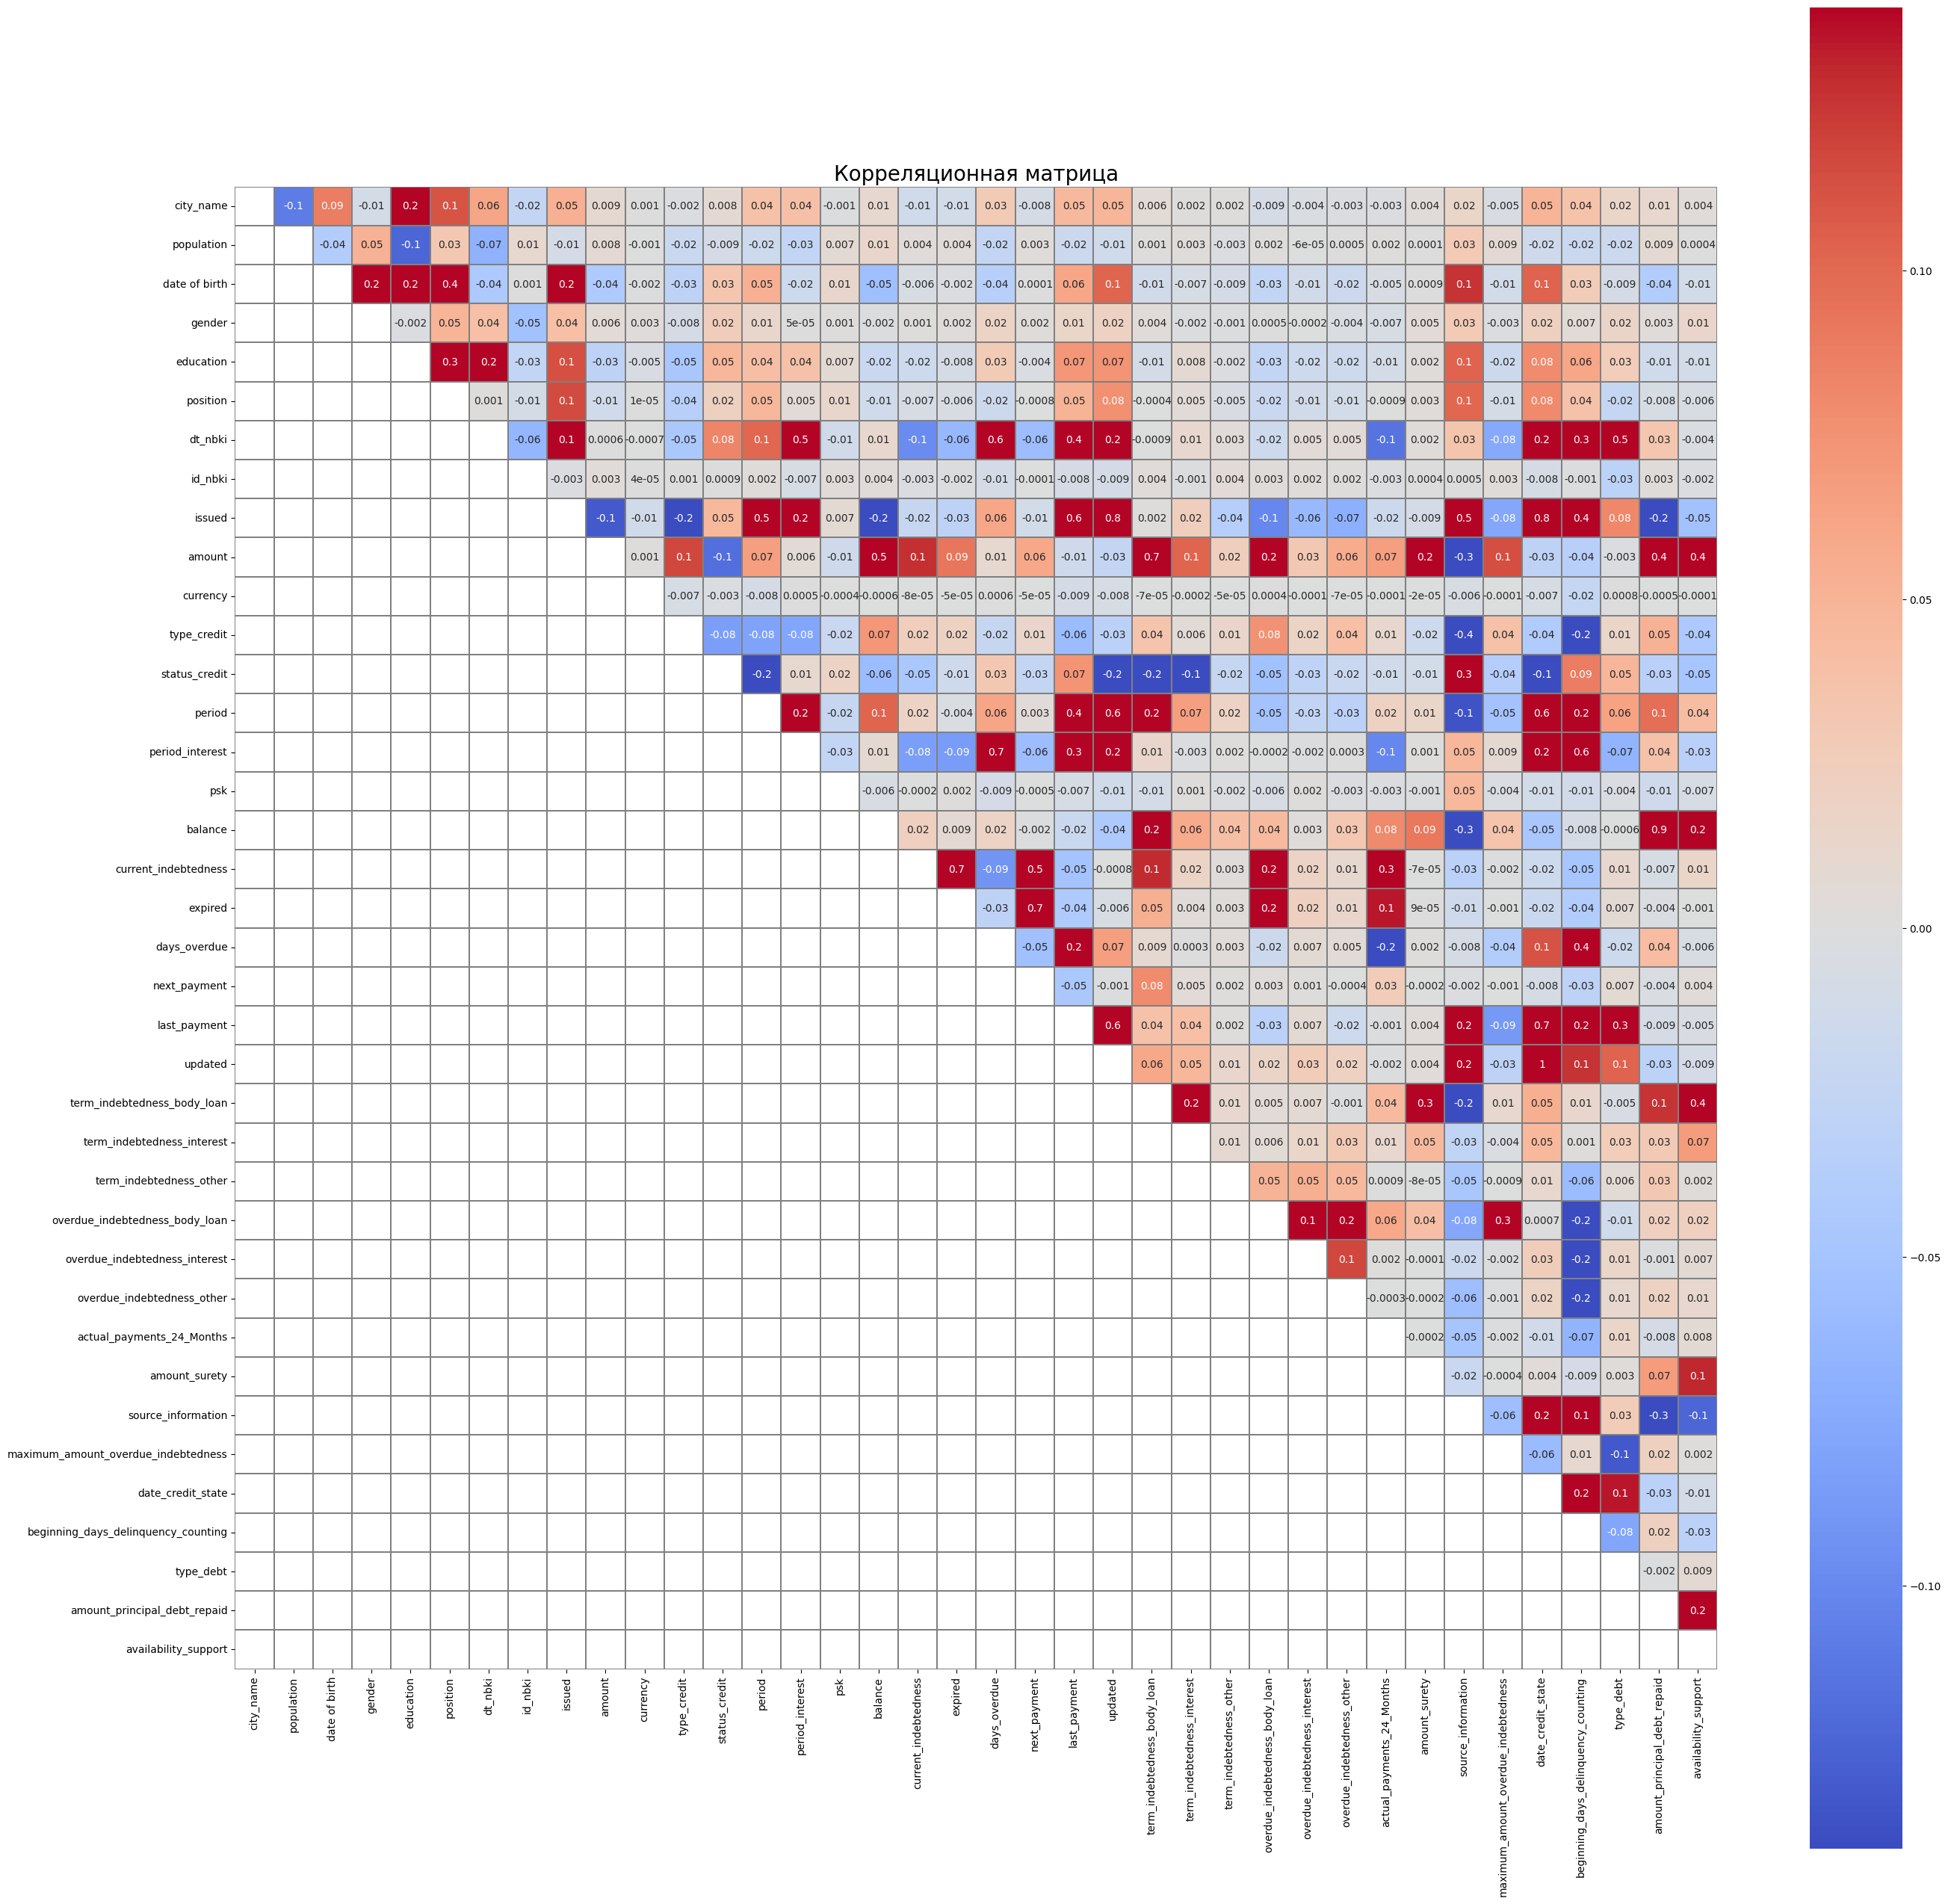

In [ ]:
# Таблица корреляции признаков
mask_1 = np.tril(df_1.corr())
plt.figure(figsize=(32,32))
sb.heatmap(df_1.corr(), cmap='coolwarm', vmin=-0.14, vmax=0.14, center= 0, square=True, annot=True, fmt='.1g', linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()
     

## Setting x_train, y_train

In [ ]:
# Сохранение предобработанного датасета
df_1.to_csv('/content/drive/My Drive/OneGA/df_3.csv') # Счетчик 1 выборка 1

In [ ]:
df_1 = pd.read_csv('/content/drive/My Drive/OneGA/df_3.csv', index_col=0) # Счетчик 1 выборка 1

In [ ]:

# Получаем корреляцию между признаками
corr_values = df_1.corr()['ym:s:goalsID']

# Получаем список столбцов, корреляция с ym:s:goalsID находится в диапазоне 0.01 > корреляция > -0.01
columns_to_drop = corr_values[(corr_values > -0.1) & (corr_values < 0.1)].index.tolist()

# Удаляем столбцы из датасета
df_1.drop(columns_to_drop, axis=1, inplace=True)

# Выводим список удаленных столбцов
print("Удаленные столбцы:", columns_to_drop)
     

Удаленные столбцы: ['Unnamed: 0', 'ym:s:browser', 'ym:s:browserCountry', 'ym:s:browserLanguage', 'ym:s:clientID', 'ym:s:cookieEnabled', 'ym:s:date', 'ym:s:firstGCLID', 'ym:s:hasGCLID', 'ym:s:ipAddress', 'ym:s:isNewUser', 'ym:s:javascriptEnabled', 'ym:s:lastAdvEngine', 'ym:s:lastDirectClickBanner', 'ym:s:lastDirectClickBannerName', 'ym:s:lastDirectPhraseOrCond', 'ym:s:lastGCLID', 'ym:s:lastSignificantGCLID', 'ym:s:lastSocialNetwork', 'ym:s:mobilePhone', 'ym:s:networkType', 'ym:s:regionCity', 'ym:s:screenHeight', 'ym:s:screenWidth', 'ym:s:startURL', 'ym:s:UTMCampaign', 'ym:s:UTMMedium', 'ym:s:UTMSource', 'ym:s:visitID']


In [ ]:
# Добавляем второстепенные цели по счетчику T1, которые можно считать близкими к выполнению цели

t1 = '184390113'
t2 = '202383175'
t3 = '202383178'
t4 = '202383181'
t5 = '184471539'
t6 = '185475457'
t7 = '186321742'
t8 = '199898941'
t9 = '199915663'
t10 = '202406278'
t11 = '202487923'
t12 = '202530652'
t13 = '202530664'
t14 = '213581695'
t15 = '214622869'
t16 = '214623034'
t17 = '222483171'
t18 = '222483175'
t19 = '222515063'
t20 = '226403682'
t21 = '226405439'
t22 = '226407340'
t23 = '231558847'
t24 = '236265808'
t25 = '249237695'
t26 = '252634848'
t27 = '252652143'

goals_t = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15, t16, t17, t18, t19, t20, t21, t22, t23, t24, t25, t26, t27]

In [ ]:
for t in goals_t:
  mask = data_backup['ym:s:goalsID'].str.contains(t)
  data_filtered = data_backup[mask]
  print(f'Количество вхождений цели {t}:',len(data_filtered))

Количество вхождений цели 36276007: 396
Количество вхождений цели 201589063: 687
Количество вхождений цели 201589066: 1307
Количество вхождений цели 204564793: 464
Количество вхождений цели 36276010: 0
Количество вхождений цели 36276013: 0
Количество вхождений цели 116942056: 164
Количество вхождений цели 152446045: 3952
Количество вхождений цели 66245989: 8031


In [ ]:
mask = data_backup['ym:s:goalsID'].str.contains('201711160')# | data_backup['ym:s:goalsID'].str.contains('199898941') # ym:pv:goalsID ym:s:goalsID 184390113,199898941

# Создаем новый датасет только с найденными значениями
data_filtered = data_backup[mask]
print(len(data_filtered))

1307


In [ ]:
data_backup['target'] = np.where(data_backup['ym:s:goalsID'].str.contains('201589066'), 1, 0)# | data_backup['ym:s:goalsID'].str.contains('199898941'), 1, 0)
df_1['target'] = data_backup['target'].copy()

In [ ]:
data_backup['target'].unique()

array([0, 1])

In [ ]:
x = df_1.drop('target', axis=1)
y = np.array(df_1['target'])

In [ ]:
# Назначаем X и y
#x = df_1.iloc[:,1:]
#y = df_1.iloc[:,0]

scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(x)
x = scaler.transform(x)
#print(X_scaled) # Посмотрим на нормализованные данные

# разбиваем на train и test
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2, random_state=42, stratify=y)
print('Размер x_train:',x_train.shape)                             
print('Размер y_train:',y_train.shape)

CLASS_COUNT=2
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

print('Размер y_train:',y_train.shape)
print('Размер y_test:',y_test.shape)

# подготовка к обучению модели
scaler = StandardScaler()
scaler.fit(x_test)

x_test_np = np.array(x_test)
y_test_np = np.array(y_test)
y_train_np = np.array(y_train)
x_test_transform = scaler.transform(x_test_np)


y_train_argmax = np.argmax(y_train_np, axis=1)
y_test_argmax = np.argmax(y_test_np, axis=1)
print()
# Check distribution of y=1 values between y_rain and y_test
occurrences (y_train_argmax, y_test_argmax)

Размер x_train: (289535, 31)
Размер y_train: (289535,)
Размер y_train: (289535, 2)
Размер y_test: (72384, 2)

0: 288489
1: 1046
0: 72123
1: 261
20% of sum in 1 in y_train and y_test is: 261     Distribution is correct 


In [ ]:
# Сохранение предобработанного датасета
df_1.to_csv('/content/drive/My Drive/OneGA/df_3_target.csv') # Счетчик 1 выборка 1

# Model_1 (Sequential)

## Model_1.1 ( f1=89% )

In [ ]:
number_of_cols = x_train.shape[1]

model_1_1 = Sequential()                                            # Создание последовательной модели нейросети
model_1_1.add(Dense(1024, input_dim=number_of_cols, activation="relu"))  # Первый полносвязный слой
model_1_1.add(BatchNormalization())
#model_1_1.add(Dense(256, activation="relu"))
#model_1_1.add(Dropout(0.1))
model_1_1.add(Dense(128, activation="relu"))
model_1_1.add(Dense(2, activation='sigmoid'))             # Выходной полносвязный слой
model_1_1.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=[f1_score])

Epoch 1/20
142/142 [==============================] - 34s 225ms/step - loss: 0.1057 - f1_score: 0.9782 - val_loss: 0.0267 - val_f1_score: 0.9964
Epoch 2/20
142/142 [==============================] - 15s 102ms/step - loss: 0.0093 - f1_score: 0.9987 - val_loss: 0.0135 - val_f1_score: 0.9968
Epoch 3/20
142/142 [==============================] - 16s 112ms/step - loss: 0.0052 - f1_score: 0.9989 - val_loss: 0.0072 - val_f1_score: 0.9978
Epoch 4/20
142/142 [==============================] - 14s 100ms/step - loss: 0.0037 - f1_score: 0.9991 - val_loss: 0.0043 - val_f1_score: 0.9986
Epoch 5/20
142/142 [==============================] - 14s 100ms/step - loss: 0.0030 - f1_score: 0.9992 - val_loss: 0.0036 - val_f1_score: 0.9990
Epoch 6/20
142/142 [==============================] - 14s 101ms/step - loss: 0.0027 - f1_score: 0.9992 - val_loss: 0.0031 - val_f1_score: 0.9990
Epoch 7/20
142/142 [==============================] - 13s 94ms/step - loss: 0.0023 - f1_score: 0.9993 - val_loss: 0.0035 - val_f1_

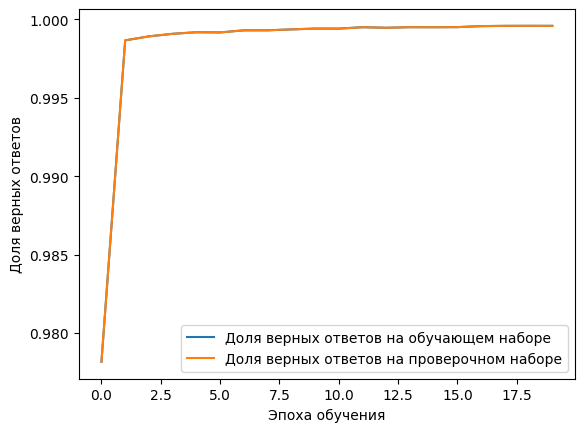

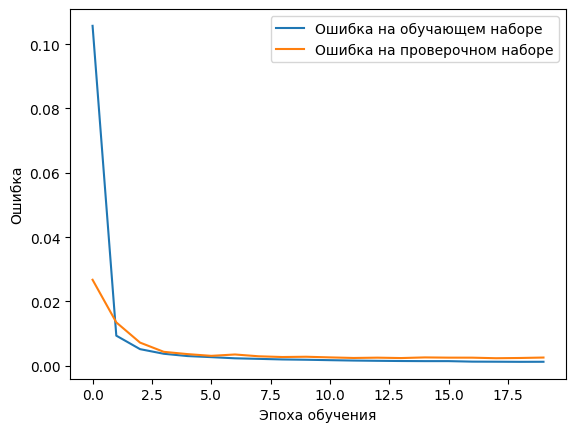

In [ ]:
import time
start_time = time.time() # счетчик времени
history_1 = model_1_1.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=2048,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_test, y_test))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history_1.history['f1_score'])) # print the highest accuracy achieved by the model

plt.plot(history_1.history['f1_score'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_1.history['f1_score'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history_1.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_1.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
import pickle
# save model object to disk
with open('/content/drive/My Drive/OneGA/model_1_1_weights.pkl', 'wb') as f:
    pickle.dump(model_1_1, f)

In [ ]:
import pickle
# load model
with open('/content/drive/My Drive/OneGA/model_1_1_weights.pkl', 'rb') as f:
    model_Auto_1_1 = pickle.load(f)

2262/2262 [==============================] - 6s 3ms/step
precision score:  0.9190283400809717
recall score:  0.8697318007662835
f1 score:  0.8937007374395527


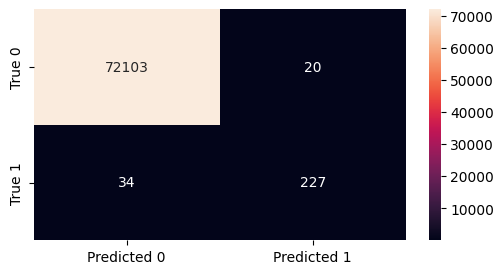

In [ ]:
y_pred = model_1_1.predict(x_test) # predict probabilities for each class
y_pred_PositiveClass = y_pred[:,1] # only  positive class predictions
my_display_result_argmax(y_test, y_pred)

[1.5280108e-05 5.7668145e-05 3.3322380e-05 1.1688298e-05 3.6098463e-05]


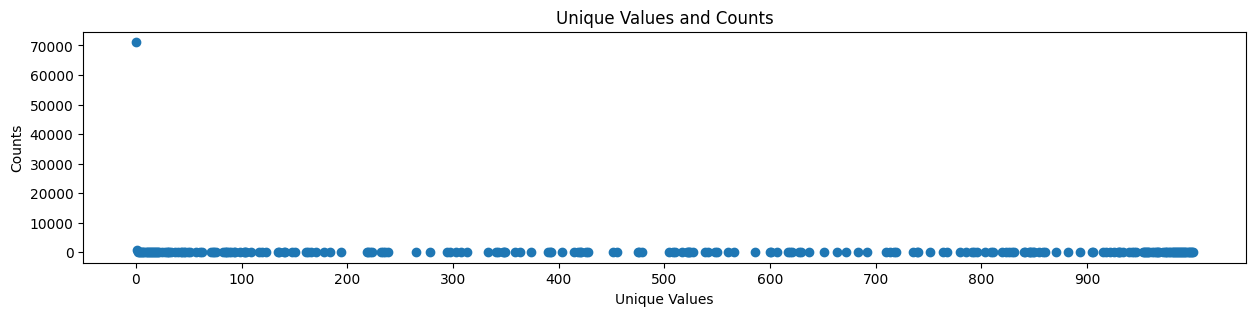

First 5 elements:
   Unique Values  Counts
0              0   71079
1              1     668
2              2     120
3              3      51
4              4      30
Last 5 elements:
     Unique Values  Counts
222            996       9
223            997       6
224            998      13
225            999      19
226           1000      52


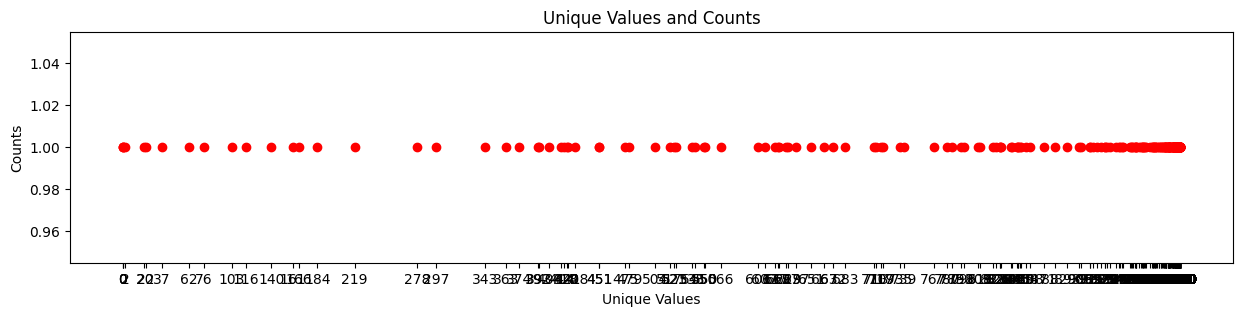

First 5 elements:
   Unique Values  Counts
0       0.000000       1
1       0.000003       1
2       0.005220       1
3       1.804057       1
4      20.127777       1
Last 5 elements:
     Unique Values  Counts
256     999.994934       1
257     999.998212       1
258     999.998331       1
259     999.999821       1
260    1000.000000       1


In [ ]:
#Analyis of predicted probabilities distribution. Такой анализ поможет сделать выбор порогового коэффициента. 
print(y_pred_PositiveClass[:5])
y_pred_PositiveClass_1 = [round(x * 1000) for x in y_pred_PositiveClass]
show_unique_values(y_pred_PositiveClass_1)
show_unique_values_3(y_pred_PositiveClass_1)

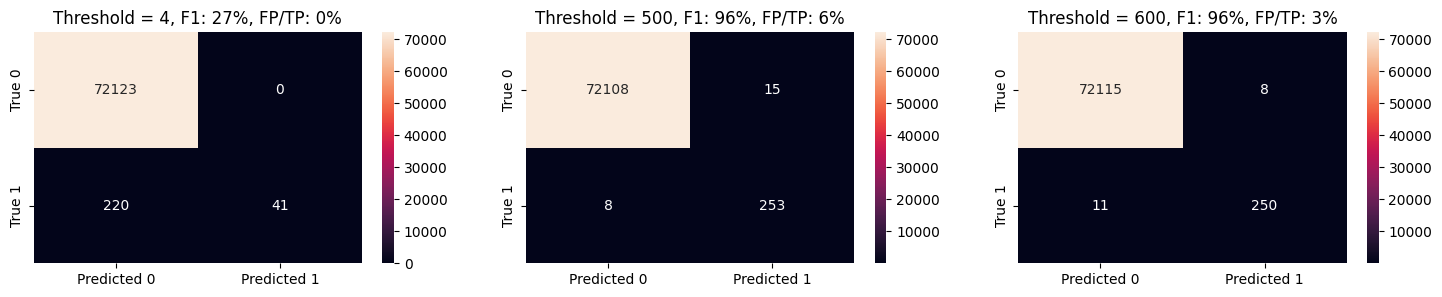

In [ ]:
# Threshold input. Используется пороговый коэффициент. Это число от 0 до 1000.
index_number_1 = 4
index_number_2 = 500
index_number_3 = 600

y_test_np = np.array(y_test)
#y_test_argmax = np.argmax(y_test_np, axis=1)
threshold(index_number_1, index_number_2, index_number_3, y_pred, y_test_argmax)

## Model_1.2 ( f1=86% )

In [ ]:
# Назначаем X и y
x = df_1.drop('target', axis=1)
y = np.array(df_1['target'])

scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(x)
x = scaler.transform(x)
#print(X_scaled) # Посмотрим на нормализованные данные

# разбиваем на train и test
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2, random_state=42, stratify=y)
print('Размер x_train:',x_train.shape)                             
print('Размер y_train:',y_train.shape)

CLASS_COUNT=2
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

print('Размер y_train:',y_train.shape)
print('Размер y_test:',y_test.shape)

# подготовка к обучению модели
scaler = StandardScaler()
scaler.fit(x_test)

x_test_np = np.array(x_test)
y_test_np = np.array(y_test)
y_train_np = np.array(y_train)
x_test_transform = scaler.transform(x_test_np)


y_train_argmax = np.argmax(y_train_np, axis=1)
y_test_argmax = np.argmax(y_test_np, axis=1)
print()
# Check distribution of y=1 values between y_rain and y_test
occurrences (y_train_argmax, y_test_argmax)

Размер x_train: (289535, 31)
Размер y_train: (289535,)
Размер y_train: (289535, 2)
Размер y_test: (72384, 2)

0: 288489
1: 1046
0: 72123
1: 261
20% of sum in 1 in y_train and y_test is: 261     Distribution is correct 


Epoch 1/30
142/142 [==============================] - 13s 84ms/step - loss: 0.0715 - f1_score: 0.9662 - val_loss: 0.0123 - val_f1_score: 0.9963
Epoch 2/30
142/142 [==============================] - 14s 98ms/step - loss: 0.0079 - f1_score: 0.9969 - val_loss: 0.0059 - val_f1_score: 0.9979
Epoch 3/30
142/142 [==============================] - 14s 96ms/step - loss: 0.0049 - f1_score: 0.9981 - val_loss: 0.0048 - val_f1_score: 0.9984
Epoch 4/30
142/142 [==============================] - 7s 48ms/step - loss: 0.0041 - f1_score: 0.9984 - val_loss: 0.0044 - val_f1_score: 0.9986
Epoch 5/30
142/142 [==============================] - 8s 59ms/step - loss: 0.0038 - f1_score: 0.9986 - val_loss: 0.0042 - val_f1_score: 0.9987
Epoch 6/30
142/142 [==============================] - 6s 42ms/step - loss: 0.0036 - f1_score: 0.9986 - val_loss: 0.0040 - val_f1_score: 0.9985
Epoch 7/30
142/142 [==============================] - 9s 62ms/step - loss: 0.0034 - f1_score: 0.9987 - val_loss: 0.0039 - val_f1_score: 0.9

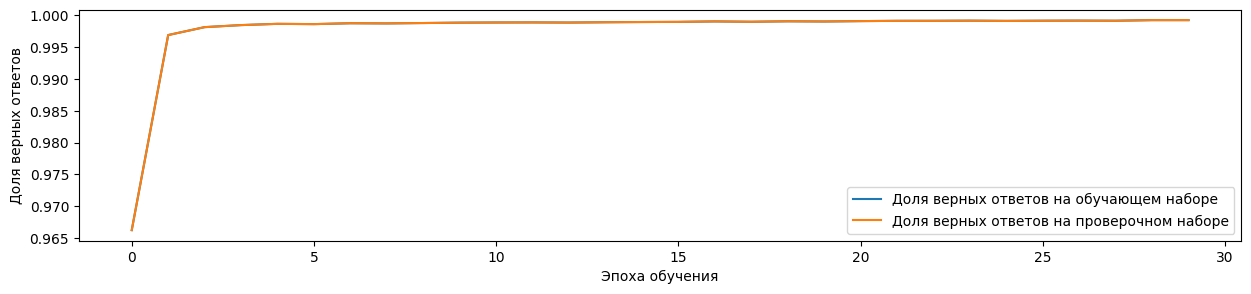

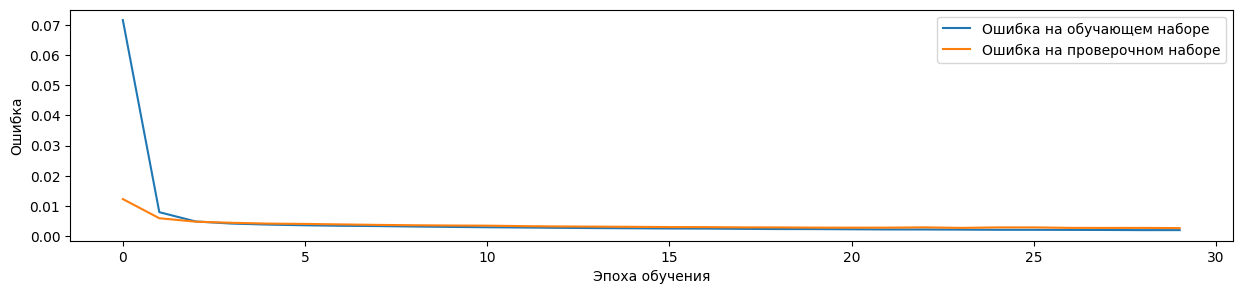

In [ ]:
number_of_cols = x_train.shape[1]

#Создание Модели
model_1_2 = Sequential()                                            # Создание последовательной модели нейросети
model_1_2.add(Dense(512, input_dim=number_of_cols, activation="relu"))  # Первый полносвязный слой
model_1_2.add(Dense(256, activation="relu"))
model_1_2.add(Dense(2, activation='sigmoid'))             # Выходной полносвязный слой
model_1_2.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=[f1_score])

import time
start_time = time.time() # счетчик времени
history_1 = model_1_2.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=30,                             # Количество эпох
                        batch_size=2048,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_test, y_test))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history_1.history['f1_score'])) # print the highest accuracy achieved by the model

plt.plot(history_1.history['f1_score'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_1.history['f1_score'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history_1.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_1.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
import pickle
# save model object to disk
with open('/content/drive/My Drive/OneGA/model_1_2_weights.pkl', 'wb') as f:
    pickle.dump(model_1_2, f)

In [ ]:
import pickle
# load model
with open('/content/drive/My Drive/OneGA/model_1_2_weights.pkl', 'rb') as f:
    model_Auto_1_2 = pickle.load(f)

2262/2262 [==============================] - 4s 2ms/step
precision score:  0.8784313725490196
recall score:  0.8582375478927203
f1 score:  0.8682170042703291


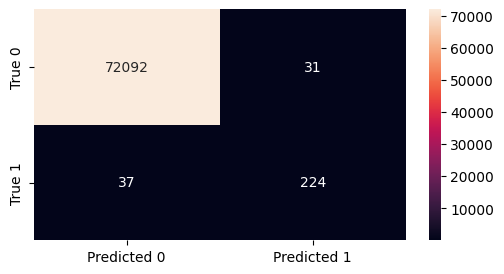

In [ ]:
y_pred = model_1_3.predict(x_test) # predict probabilities for each class
y_pred_PositiveClass = y_pred[:,1] # only positive class predictions
my_display_result_argmax(y_test, y_pred)

[2.9590886e-04 8.2140474e-07 1.4533624e-06 2.3812652e-07 3.3532685e-06]


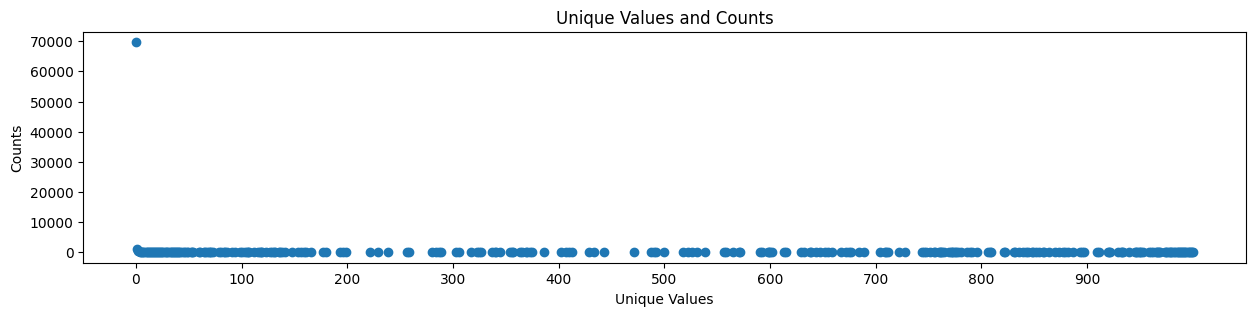

First 5 elements:
   Unique Values  Counts
0              0   69677
1              1    1173
2              2     344
3              3     247
4              4     114
Last 5 elements:
     Unique Values  Counts
268            996       9
269            997      11
270            998      21
271            999      19
272           1000       5


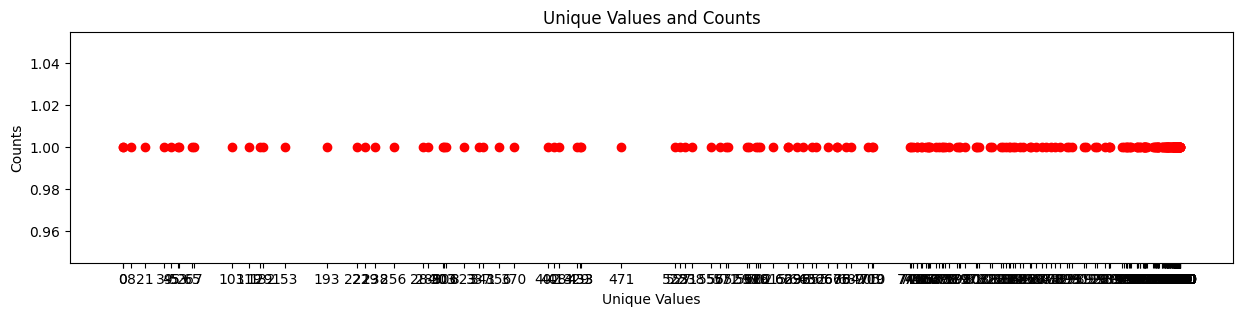

First 5 elements:
   Unique Values  Counts
0       0.000000       1
1       0.005774       1
2       7.643734       1
3      20.924963       1
4      39.211297       1
Last 5 elements:
     Unique Values  Counts
256     999.805459       1
257     999.819171       1
258     999.869074       1
259     999.913372       1
260    1000.000000       1


In [ ]:
#Analyis of predicted probabilities distribution. Такой анализ поможет сделать выбор порогового коэффициента. 
print(y_pred_PositiveClass[:5])
y_pred_PositiveClass_1 = [round(x * 1000) for x in y_pred_PositiveClass]
show_unique_values(y_pred_PositiveClass_1)
show_unique_values_3(y_pred_PositiveClass_1)

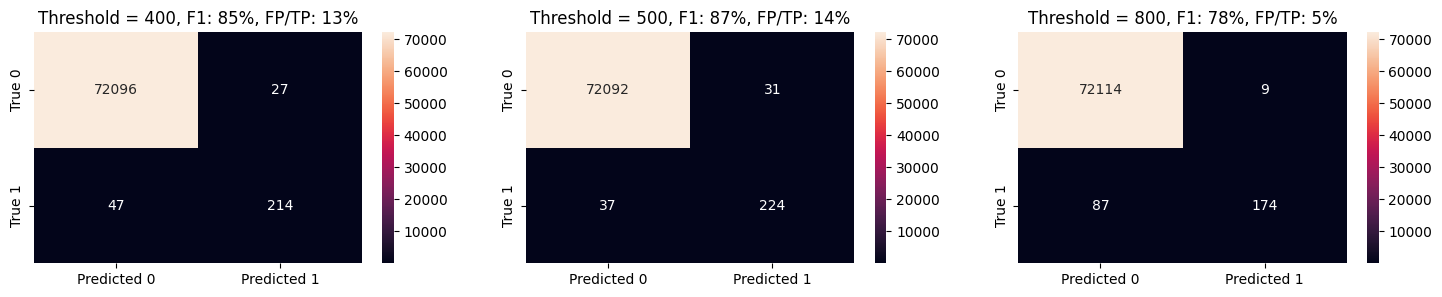

In [ ]:
# Threshold input. Используется пороговый коэффициент. Это число от 0 до 1000.
index_number_1 = 400
index_number_2 = 500
index_number_3 = 800

y_test_np = np.array(y_test)

y_test_argmax = np.argmax(y_test_np, axis=1)

threshold(index_number_1, index_number_2, index_number_3, y_pred, y_test_argmax)

#Model_2 (LogisticRegression)

## Model_2.1 ( f1=84% )

In [ ]:
# Назначаем X и y
x = df_1.drop('target', axis=1)
y = np.array(df_1['target'])

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_2_train = scaler.fit_transform(X_2_train)
X_2_test = scaler.transform(X_2_test)

print()
# Check distribution of y=1 values between y_rain and y_test
occurrences (y_train_argmax, y_test_argmax)


0: 288489
1: 1046
0: 72123
1: 261
20% of sum in 1 in y_train and y_test is: 261     Distribution is correct 


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision score:  0.87
recall score:  0.81
f1 score:  0.84


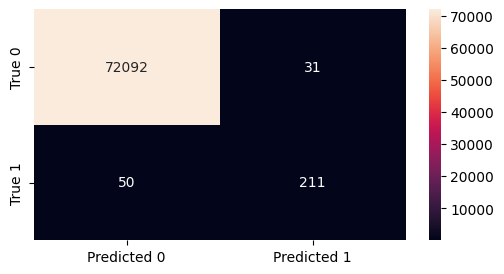

In [ ]:
model_2 = LogisticRegression()
model_2.fit(X_2_train,y_2_train)
y_2_pred = model_2.predict(X_2_test)

y_pred = model_2.predict_proba(X_2_test) # predict probabilities for each class
y_pred_PositiveClass = y_pred[:,1] # only positive class predictions
my_display_result(y_2_test, y_pred)

In [ ]:
import pickle
# save model object to disk
with open('/content/drive/My Drive/OneGA/model_2_weights.pkl', 'wb') as f:
    pickle.dump(model_2, f)

In [ ]:
import pickle
# load model
with open('/content/drive/My Drive/OneGA/model_2_weights.pkl', 'rb') as f:
    model_Auto_2 = pickle.load(f)

[2.47107336e-04 2.54273553e-06 1.97621073e-06 7.67577916e-06
 8.85313842e-05]


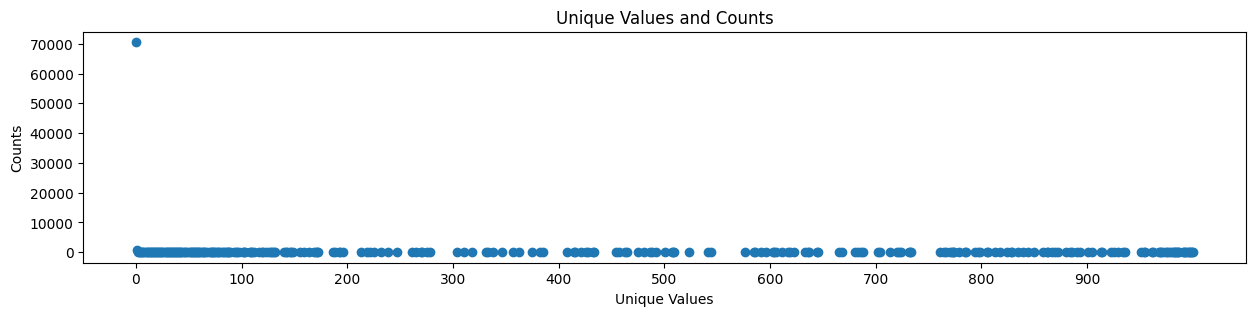

First 5 elements:
   Unique Values  Counts
0              0   70513
1              1     693
2              2     187
3              3     131
4              4      78
Last 5 elements:
     Unique Values  Counts
262            996       6
263            997       4
264            998      12
265            999      21
266           1000      56


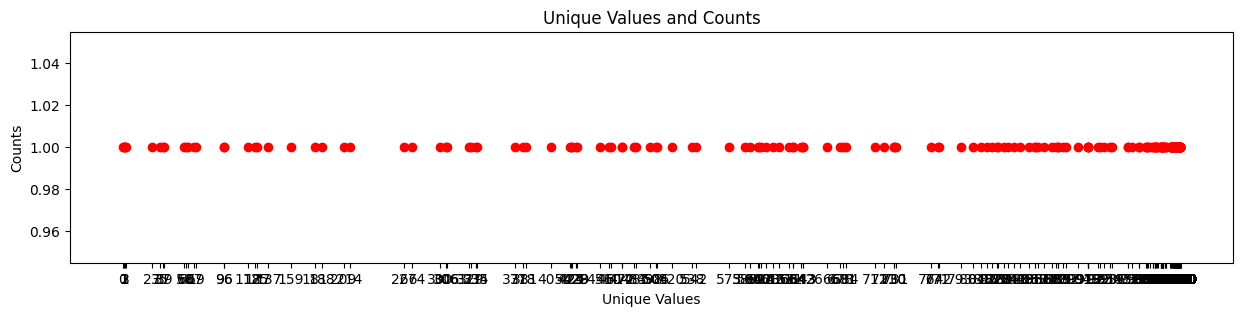

First 5 elements:
   Unique Values  Counts
0       0.000000       1
1       0.600264       1
2       1.046271       1
3       2.256403       1
4       2.587571       1
Last 5 elements:
     Unique Values  Counts
256     999.995890       1
257     999.996397       1
258     999.997526       1
259     999.999821       1
260    1000.000000       1


In [ ]:
#Analyis of predicted probabilities distribution. Такой анализ поможет сделать выбор порогового коэффициента. 
print(y_pred_PositiveClass[:5])
y_pred_PositiveClass_1 = [round(x * 1000) for x in y_pred_PositiveClass]
show_unique_values(y_pred_PositiveClass_1)
show_unique_values_3(y_pred_PositiveClass_1)

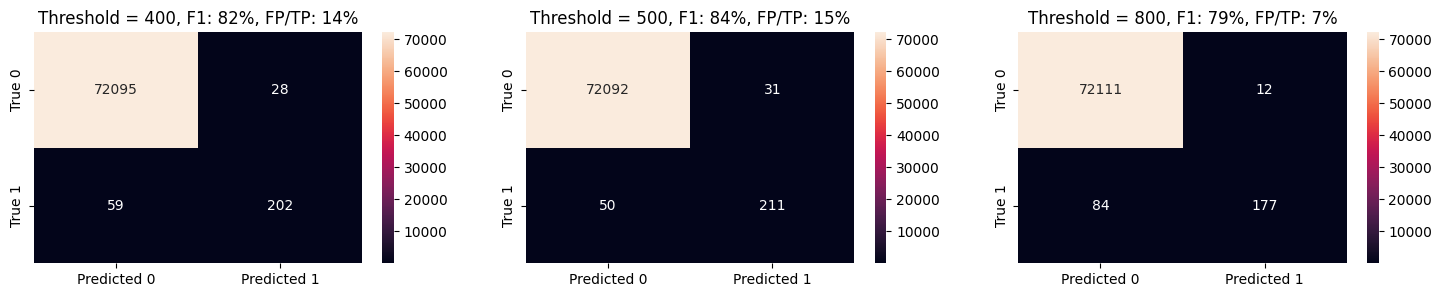

In [ ]:
# Threshold input. Используется пороговый коэффициент. Это число от 0 до 1000.
index_number_1 = 400
index_number_2 = 500
index_number_3 = 800

y_test_np = np.array(y_test)

y_test_argmax = np.argmax(y_test_np, axis=1)

threshold(index_number_1, index_number_2, index_number_3, y_pred, y_test_argmax)

# Model_3 (AutoSklearnClassifier)

##  Model_3.1 ( f1=75% )

In [ ]:
df_1 = pd.read_csv('/content/drive/My Drive/OneGA/df_3_target.csv', index_col=0)

In [ ]:
x = df_1.drop('target', axis=1)
y = np.array(df_1['target'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

occurrences (y_train, y_test) # Check distribution of y=1 values between y_rain and y_test

0: 288489
1: 1046
0: 72123
1: 261
20% of sum in 1 in y_train and y_test is: 261     Distribution is correct 


In [ ]:
# define Model
model_Auto_3 = AutoSklearnClassifier(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=8)
model_Auto_3.fit(x_train,y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      n_jobs=8, per_run_time_limit=30,
                      time_left_for_this_task=300)

In [ ]:
import pickle
# save model object to disk
with open('/content/drive/My Drive/OneGA/model_Auto_3_weights.pkl', 'wb') as f:
    pickle.dump(model_Auto_3, f)

In [ ]:
import pickle
# load model
with open('/content/drive/My Drive/OneGA/model_Auto_3_weights.pkl', 'rb') as f:
    model_Auto_3 = pickle.load(f)

precision score:  0.67
recall score:  0.84
f1 score:  0.75


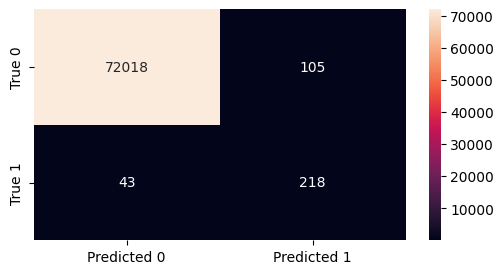

In [ ]:
#Predict, result and threshold
y_pred = model_Auto_3.predict_proba(x_test) # predict probabilities for each class
y_pred_PositiveClass = y_pred[:,1] # only positive class predictions
my_display_result(y_test, y_pred)

[0.00096257 0.00096257 0.00096257 0.00096257 0.00096257]


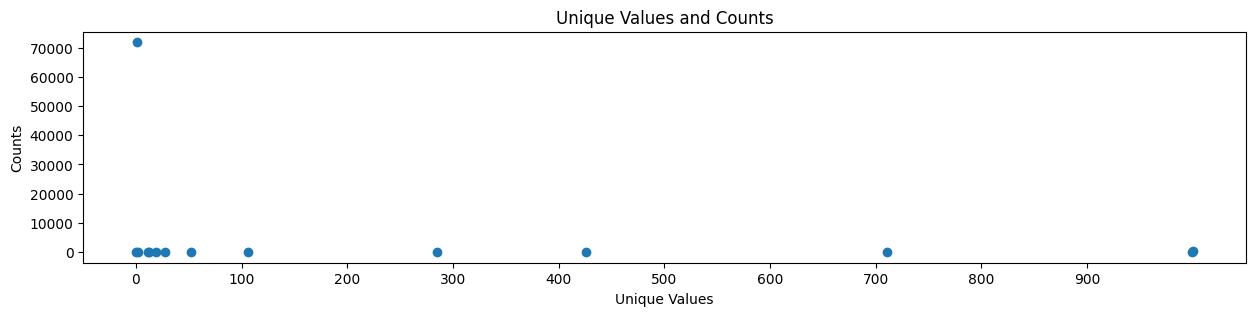

First 5 elements:
   Unique Values  Counts
0              0     105
1              1   71815
2              2      13
7             11      38
8             12       6
Last 5 elements:
    Unique Values  Counts
13            285       6
9             426       1
5             711       1
3             999       3
4            1000     319


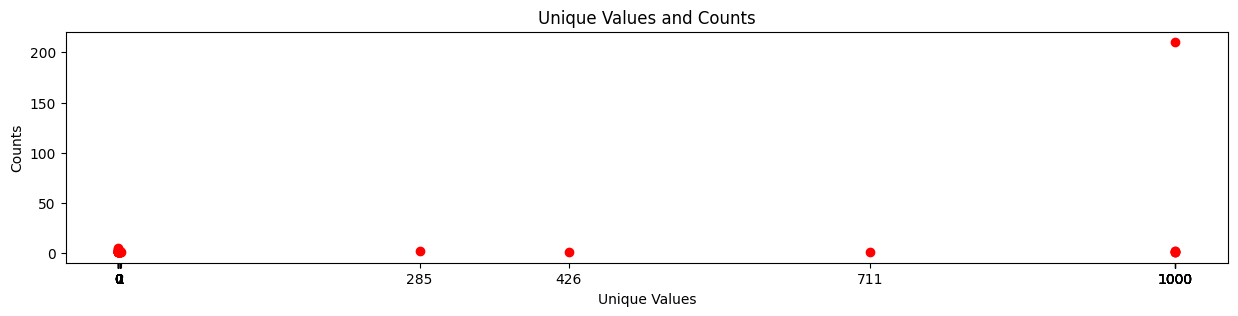

In [ ]:
#Analyis of predicted probabilities distribution. Такой анализ поможет сделать выбор порогового коэффициента. 
print(y_pred_PositiveClass[:5])
y_pred_PositiveClass_1 = [round(x * 1000) for x in y_pred_PositiveClass]
show_unique_values(y_pred_PositiveClass_1)
show_unique_values_2(y_pred_PositiveClass_1)
print()

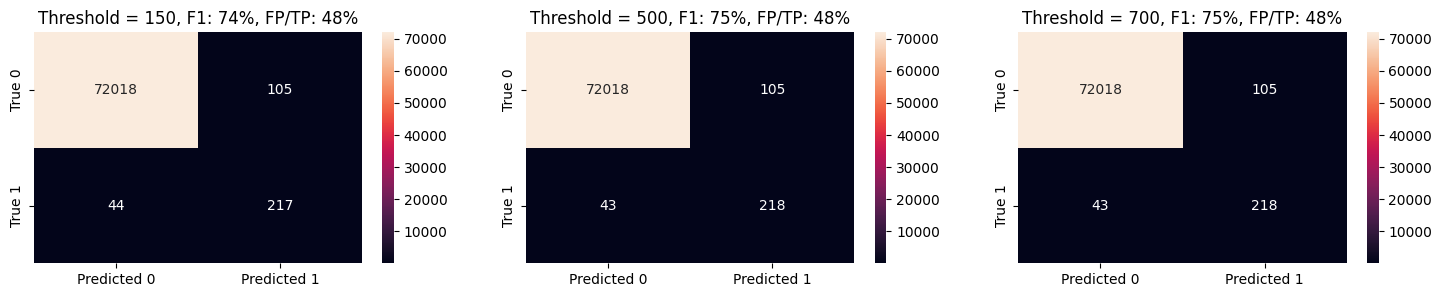

In [ ]:
# Threshold input. Используется пороговый коэффициент. Это число от 0 до 1000.
index_number_1 = 150
index_number_2 = 500
index_number_3 = 700

y_test_np = np.array(y_test)
#y_test_argmax = np.argmax(y_test_np, axis=1)
threshold(index_number_1, index_number_2, index_number_3, y_pred, y_test_np)

## Model_3.2 ( f1=75% )

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

occurrences (y_train, y_test) # Check distribution of y=1 values between y_rain and y_test

0: 288489
1: 1046
0: 72123
1: 261
20% of sum in 1 in y_train and y_test is: 261     Distribution is correct 


In [ ]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model_Auto_3_2 = AutoSklearnClassifier(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=8)
model_Auto_3_2.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33645 instead
  warnings.warn(


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      n_jobs=8, per_run_time_limit=30,
                      time_left_for_this_task=300)

In [ ]:
# save model object to disk
with open('/content/drive/My Drive/OneGA/model_Auto_3_2_weights.pkl', 'wb') as f:
    pickle.dump(model_Auto_3_2, f)

In [ ]:
# save model object to disk
with open('/content/drive/My Drive/OneGA/model_Auto_3_2 _weights.pkl', 'wb') as f:
    pickle.dump(model_Auto_3_2, f)

precision score:  0.67
recall score:  0.84
f1 score:  0.75


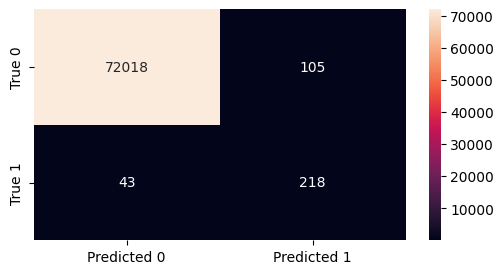

In [ ]:
y_pred = model_Auto_3_2.predict_proba(x_test) # predict probabilities for each class
y_pred_PositiveClass = y_pred[:,1] # only positive class predictions
my_display_result(y_test, y_pred)

[0.00096257 0.00096257 0.00096257 0.00096257 0.00096257]


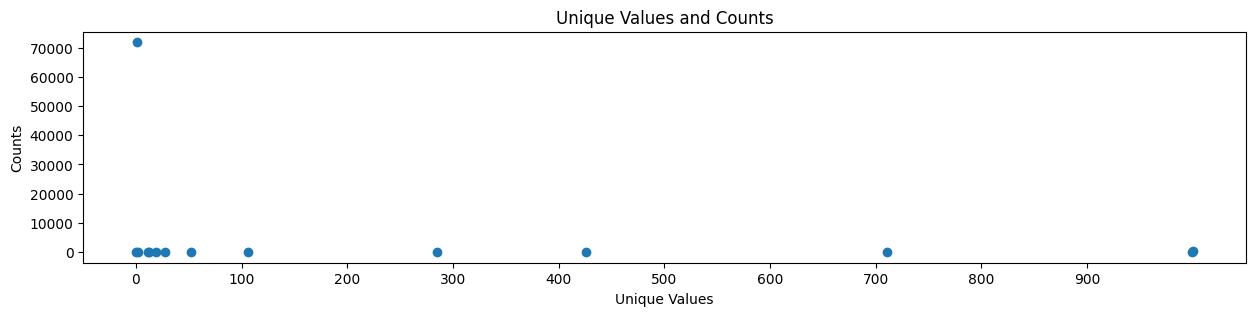

First 5 elements:
   Unique Values  Counts
0              0     105
1              1   71815
2              2      13
7             11      38
8             12       6
Last 5 elements:
    Unique Values  Counts
13            285       6
9             426       1
5             711       1
3             999       3
4            1000     319


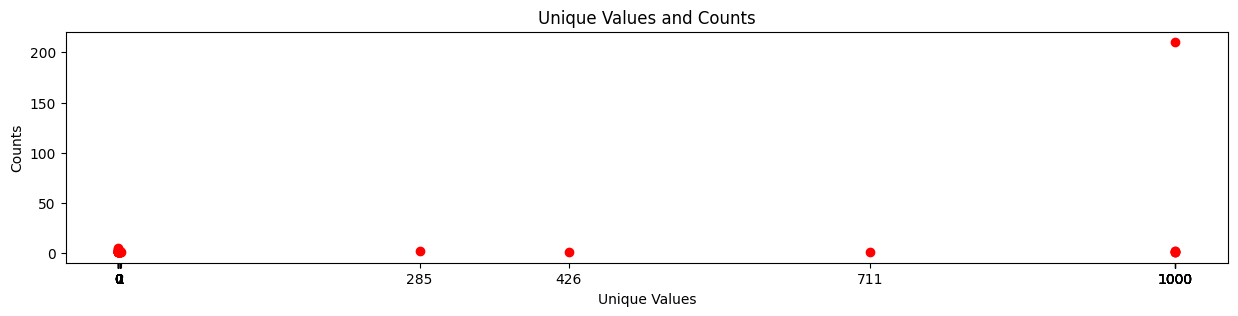

First 5 elements:
   Unique Values  Counts
0   0.000000e+00       5
1  1.551251e-264       2
2  3.907919e-249       2
3  3.908081e-249       1
4  1.603350e-222       3
Last 5 elements:
    Unique Values  Counts
29         1000.0       1
30         1000.0       2
31         1000.0       2
32         1000.0       1
33         1000.0     210


In [ ]:
print(y_pred_PositiveClass[:5])
y_3_pred_PositiveClass_1 = [round(x * 1000) for x in y_pred_PositiveClass]
show_unique_values(y_pred_PositiveClass_1)
show_unique_values_3(y_pred_PositiveClass_1)

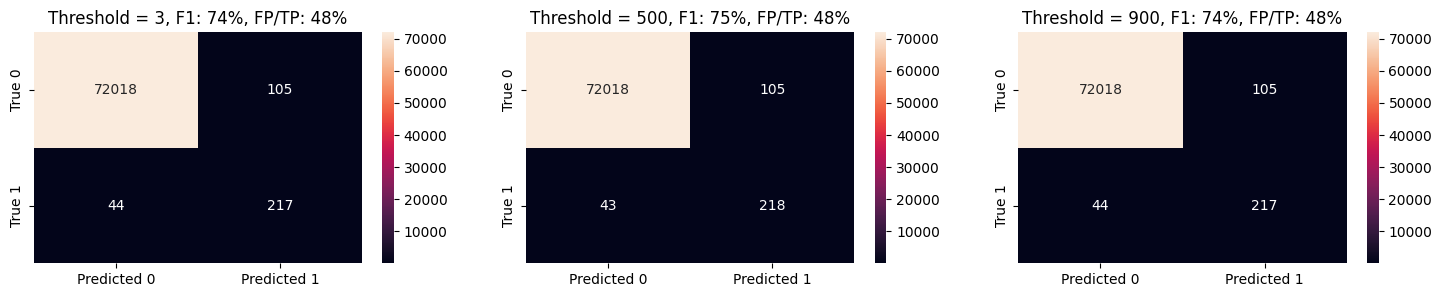

In [ ]:
# Threshold input. Используется пороговый коэффициент. Это число от 0 до 1000.
index_number_1 = 3
index_number_2 = 500
index_number_3 = 900

threshold(index_number_1, index_number_2, index_number_3, y_pred, y_test)

#Model_4 (RandomForest)

##Model_4.1  ( f1=96% )

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

occurrences (y_train, y_test) # Check distribution of y=1 values between y_rain and y_test

0: 288489
1: 1046
0: 72123
1: 261
20% of sum in 1 in y_train and y_test is: 261     Distribution is correct 


In [ ]:
# define Model
model_Auto_4_1 = RandomForestClassifier()
model_Auto_4_1.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# save model object to disk
with open('/content/drive/My Drive/OneGA/model_Auto_4_1_weights.pkl', 'wb') as f:
    pickle.dump(model_Auto_4_1, f)

In [ ]:
# load model
with open('/content/drive/My Drive/OneGA/model_Auto_4_1_weights.pkl', 'rb') as f:
    model_Auto_4_1 = pickle.load(f)

precision score:  0.94
recall score:  0.97
f1 score:  0.96


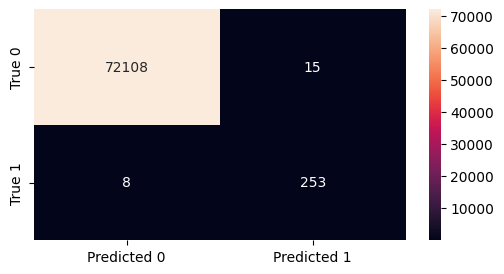

In [ ]:
#Predict, result and threshold
y_pred = model_Auto_4_1.predict_proba(x_test) # predict probabilities for each class
y_pred_PositiveClass = y_pred[:,1] # only positive class predictions
my_display_result(y_test, y_pred)

[0. 0. 0. 0. 0.]


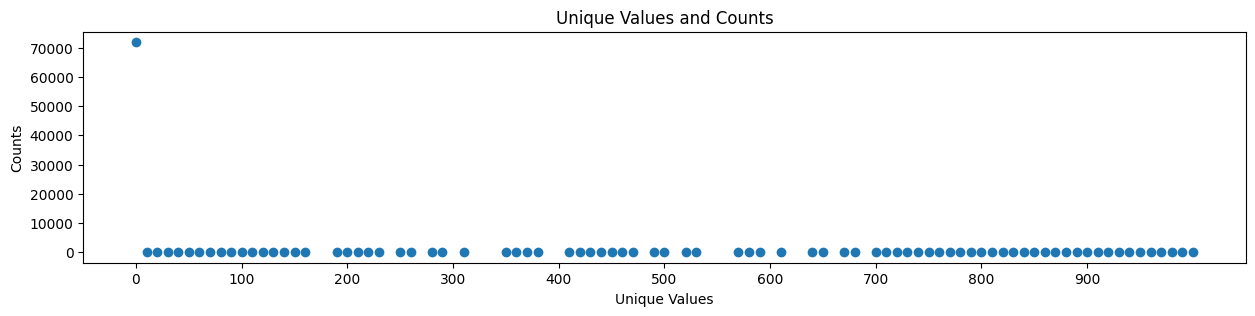

First 5 elements:
   Unique Values  Counts
0              0   71832
2             10     131
4             20      35
5             30      22
6             40       8
Last 5 elements:
    Unique Values  Counts
71            960      18
73            970      19
75            980      29
77            990      23
78           1000      41


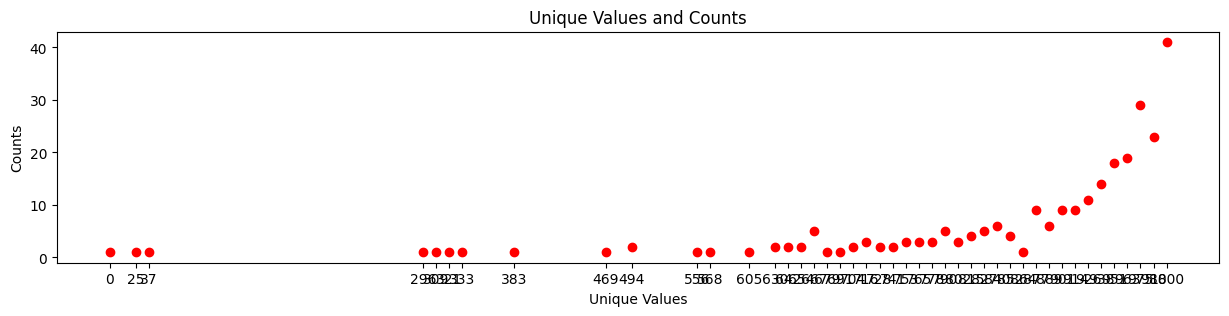

First 5 elements:
   Unique Values  Counts
0       0.000000       1
1      24.691358       1
2      37.037037       1
3     296.296296       1
4     308.641975       1
Last 5 elements:
    Unique Values  Counts
39     950.617284      18
40     962.962963      19
41     975.308642      29
42     987.654321      23
43    1000.000000      41


In [ ]:
#Analyis of predicted probabilities distribution. Такой анализ поможет сделать выбор порогового коэффициента. 
print(y_pred_PositiveClass[:5])
y_pred_PositiveClass_1 = [round(x * 1000) for x in y_pred_PositiveClass]
show_unique_values(y_pred_PositiveClass_1)
show_unique_values_3(y_pred_PositiveClass_1)

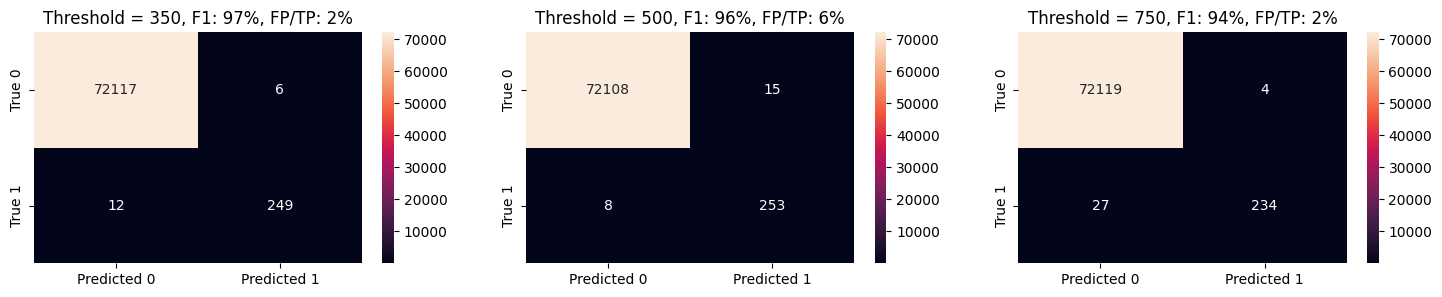

In [ ]:
# Threshold input. Используется пороговый коэффициент. Это число от 0 до 1000.
index_number_1 = 350
index_number_2 = 500
index_number_3 = 750

threshold(index_number_1, index_number_2, index_number_3, y_pred, y_test)